In [1]:
import pandas as pd
pd.set_option("display.max_columns", 150)
import glob

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
citi = pd.read_csv('../data/citibike_vis.csv')
citi = citi.drop(columns = 'Unnamed: 0') 
citi = citi.sort_values('date').reset_index(drop = True)

In [5]:
citi

,date,num_of_trips,holiday,prcp,snow,tmax,tmin,median_trip_duration,mean_trip_duration,day_of_week,year,month,season
0,2019-01-01,21962,True,15,0.0,57.92,39.02,663.0,1175.93,1,2019,1,Winter
1,2019-01-02,37797,False,0,0.0,39.92,35.06,548.0,780.93,2,2019,1,Winter
2,2019-01-03,41676,False,0,0.0,44.06,37.04,533.0,769.52,3,2019,1,Winter
3,2019-01-04,43922,False,0,0.0,46.94,35.06,535.0,778.15,4,2019,1,Winter
4,2019-01-05,17432,False,127,0.0,46.94,41.00,476.0,811.47,5,2019,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2021-12-27,31583,False,23,0.0,39.02,33.98,511.0,1452.87,0,2021,12,Winter
1091,2021-12-28,40728,False,13,0.0,46.94,35.96,574.0,1614.75,1,2021,12,Winter
1092,2021-12-29,39656,False,36,0.0,44.06,41.00,558.0,1450.41,2,2021,12,Winter
1093,2021-12-30,46925,False,13,0.0,48.92,42.98,587.0,1507.32,3,2021,12,Winter


In [7]:
citi.groupby(['year','season'])['num_of_trips'].sum()

year  season
2019  Fall      6016181
      Spring    5018617
      Summer    6650658
      Winter    2866241
2020  Fall      6473798
      Spring    3239109
      Summer    6317595
      Winter    3476355
2021  Fall      8509079
      Spring    6322928
      Summer    9335828
      Winter    3493616
Name: num_of_trips, dtype: int64

In [10]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  1095 non-null   object 
 1   num_of_trips          1095 non-null   int64  
 2   holiday               1095 non-null   bool   
 3   prcp                  1095 non-null   int64  
 4   snow                  1095 non-null   float64
 5   tmax                  1095 non-null   float64
 6   tmin                  1095 non-null   float64
 7   median_trip_duration  1095 non-null   float64
 8   mean_trip_duration    1095 non-null   float64
 9   day_of_week           1095 non-null   int64  
 10  year                  1095 non-null   int64  
 11  month                 1095 non-null   int64  
 12  season                1095 non-null   object 
dtypes: bool(1), float64(5), int64(5), object(2)
memory usage: 103.9+ KB


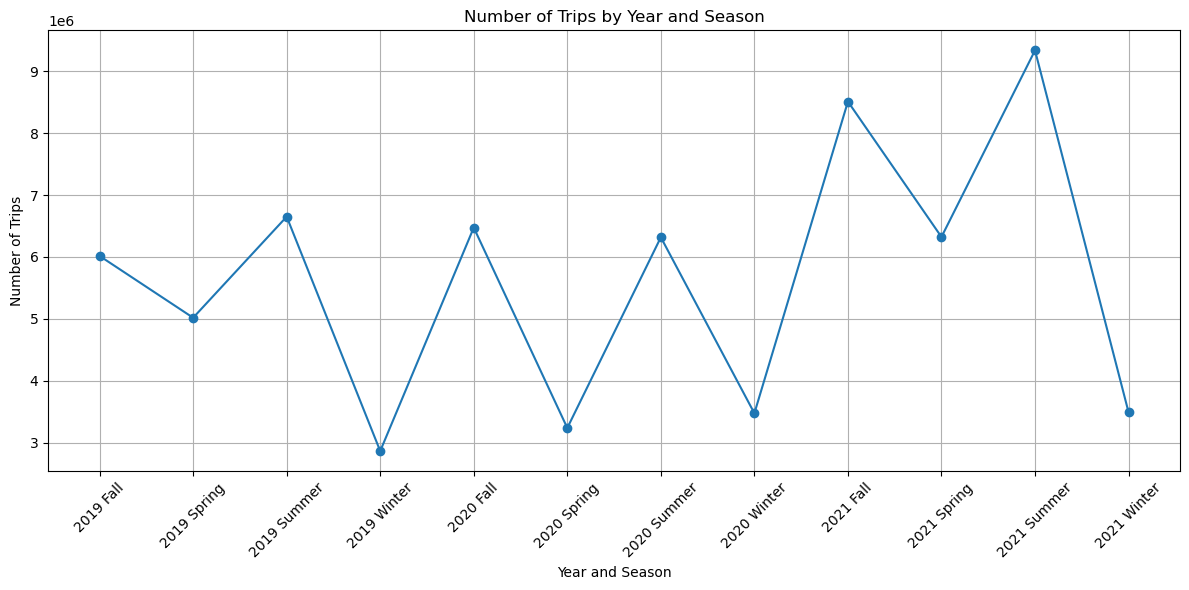

In [11]:
season_year = citi.groupby(['year', 'season'])['num_of_trips'].sum().reset_index()

season_year['year_season'] = season_year['year'].astype(str) + ' ' + season_year['season']

plt.figure(figsize=(12, 6))
plt.plot(season_year['year_season'], season_year['num_of_trips'], marker='o', linestyle='-')

plt.xlabel('Year and Season')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Year and Season')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()

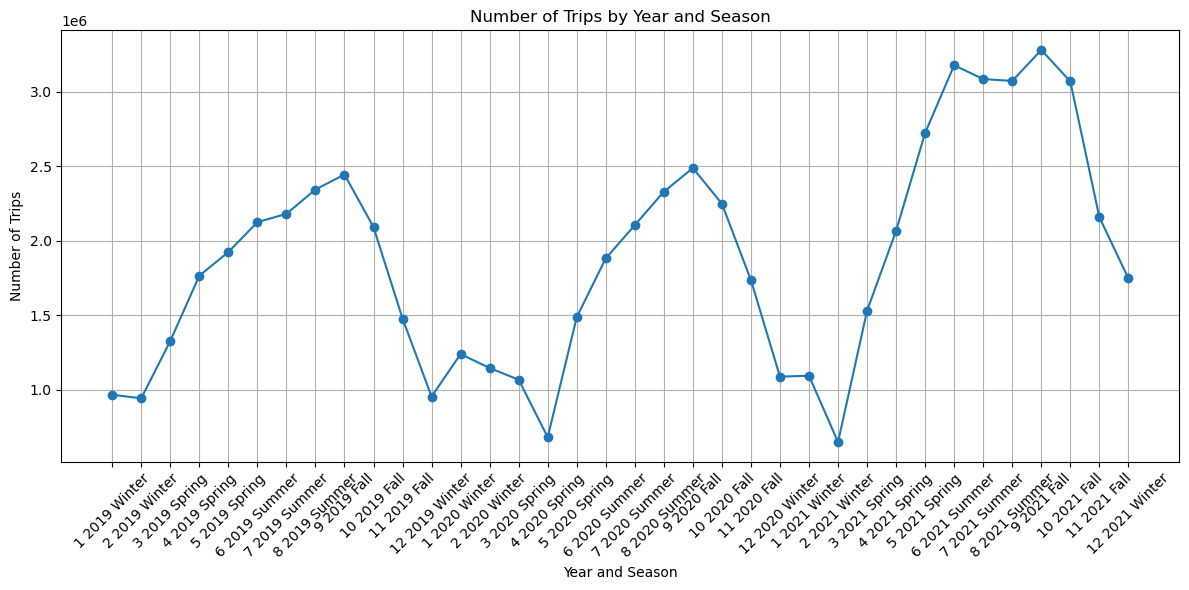

In [16]:
season_year = citi.groupby(['year','month', 'season',])['num_of_trips'].sum().reset_index()

season_year['month_year_season'] = season_year['month'].astype(str) + ' ' + season_year['year'].astype(str) + ' ' + season_year['season']

plt.figure(figsize=(12, 6))
plt.plot(season_year['month_year_season'], season_year['num_of_trips'], marker='o', linestyle='-')

plt.xlabel('Year and Season')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Year and Season')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()